In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5813953488372093


In [11]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=5,scoring='accuracy'))

0.6232542105781542

# Binning

In [19]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [20]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [21]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [22]:
trf.named_transformers_['second'].n_bins_

array([15])

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred = clf.predict(X_test_trf)
print(accuracy_score(y_test,y_pred))

0.6651162790697674


In [24]:
X_trf = trf.transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=5,scoring='accuracy'))

0.6387176204077614

In [25]:
def deiscretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=5,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.hist(X['Age'])
    plt.title('Age Before')
    
    plt.subplot(1,2,2)
    plt.hist(X_trf[:,0],color='red')
    plt.title('Age After')
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.hist(X['Fare'])
    plt.title('Fare Before')
    
    plt.subplot(1,2,2)
    plt.hist(X_trf[:,1],color='red')
    plt.title('Fare After')
    
    plt.show()
    
    

0.6387471683246331


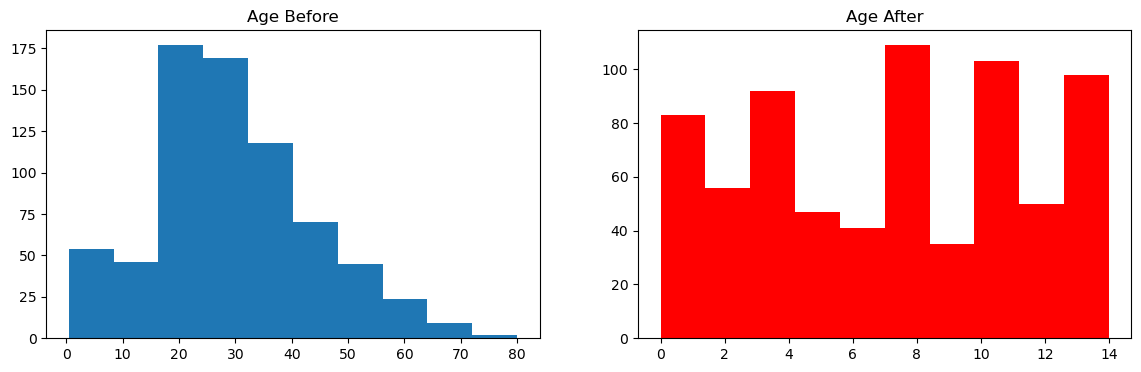

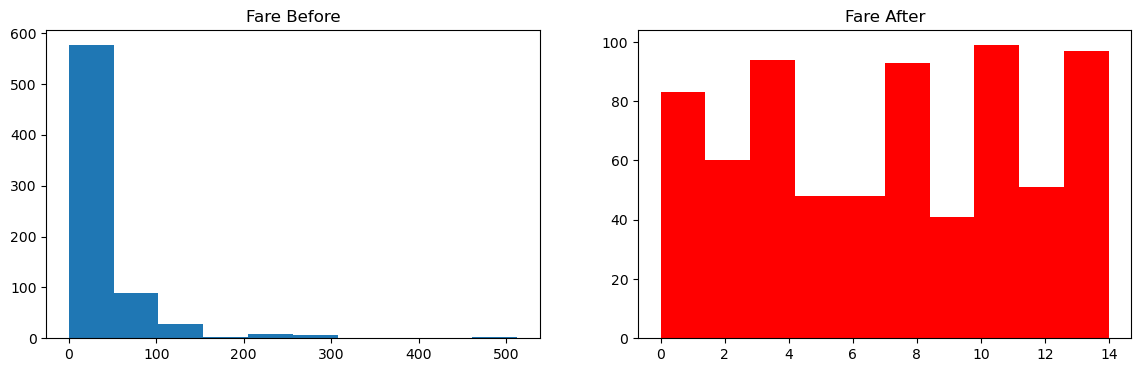

In [31]:
deiscretize(15,'quantile')